## Model Training:

#### Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

## 

In [103]:

# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [104]:
df = pd.read_csv('data/stud.csv')

In [105]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Preparing X and Y:

In [106]:
X = df.drop(columns=['math_score'],axis=1)
y = df['math_score']

In [107]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [108]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [109]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [110]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [111]:
num_features

Index(['reading_score', 'writing_score'], dtype='object')

In [112]:
cat_features

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')

In [113]:
X = preprocessor.fit_transform(X)

In [114]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.193999,0.391492
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.427476,1.313269
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.770109,1.642475
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.833899,-1.583744
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.605158,0.457333


In [115]:
X.shape

(1000, 19)

In [116]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

#### Create an Evaluate Function to give all metrics after model Training

In [117]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

### Applying Models:

In [118]:
# Dictionary of regression models with their names as keys and model objects as values
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

# Lists to store model names and their R2 scores
model_list = []  # Stores model names
r2_list = []     # Stores R2 scores for test data

# Loop through each model in the models dictionary
for i in range(len(list(models))):  
    # Extract the i-th model from the dictionary using list(models.values())
    model = list(models.values())[i]  # Access the i-th model object (e.g., LinearRegression, Lasso, etc.)
    
    # Train the model on the training data
    model.fit(X_train, y_train)  # .fit() trains the model using X_train and y_train
    
    # Make predictions on both training and test datasets
    y_train_pred = model.predict(X_train)  # Predict on training data
    y_test_pred = model.predict(X_test)    # Predict on test data
    
    # Evaluate the model's performance on the training data
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred) 
    # evaluate_model() returns MAE, RMSE, and R2 score for the model's predictions on training data
    
    # Evaluate the model's performance on the test data
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    # evaluate_model() returns MAE, RMSE, and R2 score for the model's predictions on test data
    
    # Print the model name
    print(list(models.keys())[i])  # list(models.keys()) gets all the model names, and [i] gets the current model's name
    
    # Store the model name in the model_list
    model_list.append(list(models.keys())[i])  # Append the model name to model_list
    
    # Print performance metrics for the training set
    print('Model performance for Training set')
    print(f"- Root Mean Squared Error: {model_train_rmse:.4f}")  # .4f rounds to 4 decimal places
    print(f"- Mean Absolute Error: {model_train_mae:.4f}")  # Print MAE for training data
    print(f"- R2 Score: {model_train_r2:.4f}")  # Print R2 score for training data
    
    print('----------------------------------')
    
    # Print performance metrics for the test set
    print('Model performance for Test set')
    print(f"- Root Mean Squared Error: {model_test_rmse:.4f}")  # Print RMSE for test data
    print(f"- Mean Absolute Error: {model_test_mae:.4f}")  # Print MAE for test data
    print(f"- R2 Score: {model_test_r2:.4f}")  # Print R2 score for test data
    
    # Store the R2 score for the test set in r2_list
    r2_list.append(model_test_r2)  # Store R2 score for current model's test predictions
    
    # Print a separator for better readability
    print('=' * 35)  # Print a line of "=" to separate each model's output
    print('\n')  # Add a newline for readability


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7077
- Mean Absolute Error: 4.5167
- R2 Score: 0.8555
-----------------------

In [119]:
model_list, r2_list

(['Linear Regression',
  'Lasso',
  'Ridge',
  'K-Neighbors Regressor',
  'Decision Tree',
  'Random Forest Regressor',
  'XGBRegressor',
  'CatBoosting Regressor',
  'AdaBoost Regressor'],
 [0.8804332983749564,
  0.8253197323627853,
  0.8805931485028737,
  0.7838129945787431,
  0.7408752584877685,
  0.851032263380726,
  0.8277965784072876,
  0.8516318920747058,
  0.8536049782720351])

## Results In DataFrame:

In [120]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)
# lisis used to convert this into tuple list , beacuse dataframe can not work on list

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880433
8,AdaBoost Regressor,0.853605
7,CatBoosting Regressor,0.851632
5,Random Forest Regressor,0.851032
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,Decision Tree,0.740875


#### fit_intercept=True (default in LinearRegression) means the model will calculate and include an intercept (bias) term in the linear equation 

y=mx+b, where 
𝑏
b is the intercept.

#### If fit_intercept=False, the model will not calculate an intercept and force the line to pass through the origin (0,0), i.e., 

y=mx

In [121]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.04


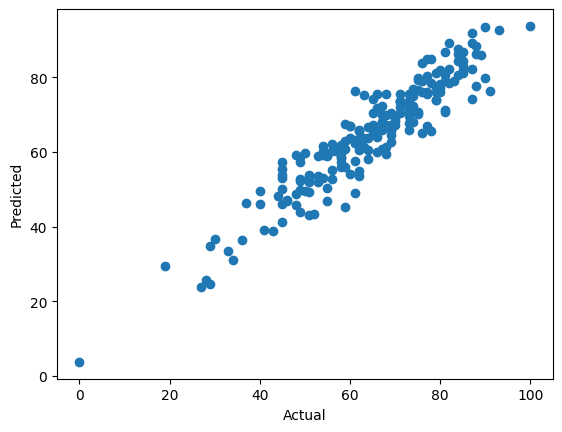

In [122]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

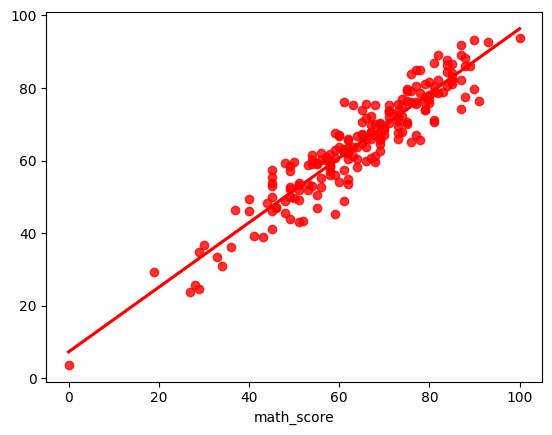

In [123]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

Without the semicolon, Jupyter might display the object information of the plot. Adding ; prevents this extra output.

## Difference between Actual and Predicted Values:

In [124]:
y_test

521    91
737    53
740    80
660    74
411    84
       ..
408    52
332    62
208    74
613    65
78     61
Name: math_score, Length: 200, dtype: int64

In [125]:
len(y_pred)

200

#### If y_test and y_pred values are different in dimensions:
y_test = y_test[:len(y_pred)]

In [126]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287


## Gradient Decent Example:

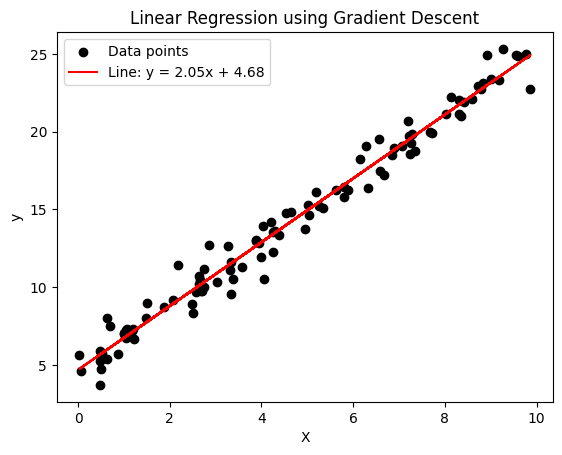

Final slope (m): 2.05
Final intercept (b): 4.68


In [127]:
import numpy as np
import matplotlib.pyplot as plt

# Example data
X = np.random.rand(100, 1) * 10  # 100 random data points for X
y = 2 * X + 5 + np.random.randn(100, 1)  # y = 2X + 5 + some noise

# Hyperparameters
learning_rate = 0.01 # Step size for gradient descent
iterations = 1000  # Number of iterations for gradient descent

# Initialize parameters (slope and intercept)
m = 0  # slope (weight)
b = 0  # intercept (bias)

# Gradient Descent loop
for _ in range(iterations):
    y_pred = m * X + b  # Prediction (y = mx + b)
    
    # Calculate gradients
    dm = (-2/len(X)) * np.sum(X * (y - y_pred))  # Gradient for slope
    db = (-2/len(X)) * np.sum(y - y_pred)  # Gradient for intercept
    
    # Update parameters
    m = m - learning_rate * dm  # Update slope
    b = b - learning_rate * db  # Update intercept

# Plot the result
plt.scatter(X, y, color='black', label='Data points')
plt.plot(X, m * X + b, color='red', label=f'Line: y = {m:.2f}x + {b:.2f}')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression using Gradient Descent')
plt.show()

# Output final parameters
print(f"Final slope (m): {m:.2f}")
print(f"Final intercept (b): {b:.2f}")
